<a href="https://colab.research.google.com/github/dhio-n/estatistica_com_python/blob/main/analise_de_dados_viagens_governo_federal_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pagamento = pd.read_csv('/content/drive/MyDrive/Asimov/2023_20250309_Viagens/2023_Pagamento.csv', encoding='Windows-1252', sep=';', decimal=',')
passagem = pd.read_csv('/content/drive/MyDrive/Asimov/2023_20250309_Viagens/2023_Passagem.csv', encoding='Windows-1252', sep=';', decimal=',')
trecho = pd.read_csv('/content/drive/MyDrive/Asimov/2023_20250309_Viagens/2023_Trecho.csv', encoding='Windows-1252', sep=';', decimal=',')
viagem = pd.read_csv('/content/drive/MyDrive/Asimov/2023_20250309_Viagens/2023_Viagem.csv', encoding='Windows-1252', sep=';', decimal=',')

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
viagem

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.0,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.0,0.00
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.0,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.0,1095.35
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831006,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.0,0.00
831007,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.0,0.00
831008,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.0,0.00
831009,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.0,400.00


viagem['Valor diárias'] = viagem['Valor diárias'].str.replace(',','.').astype(float)
viagem['Valor passagens'] = viagem['Valor passagens'].str.replace(',','.').astype(float)
viagem['Valor devolução'] = viagem['Valor devolução'].str.replace(',','.').astype(float)
viagem['Valor outros gastos'] = viagem['Valor outros gastos'].str.replace(',','.').astype(float)




In [12]:
viagem['Despesas'] = viagem['Valor diárias'] + viagem['Valor passagens'] + viagem['Valor devolução'] + viagem['Valor outros gastos']
viagem['Cargo'] = viagem['Cargo'].fillna('NÃO IDENTIFICADO')
viagem

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.0,0.00,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NÃO IDENTIFICADO,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.0,0.00,7894.50
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.0,0.00,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.0,1095.35,48095.18
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.0,0.00,1013.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831006,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.0,0.00,3938.18
831007,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.0,0.00,2926.18
831008,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.0,0.00,5290.08
831009,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.0,400.00,4464.81


In [53]:
viagem_por_cargo = (viagem['Cargo'].value_counts(normalize=True)*100).rename('Proporção de viagens').reset_index()
filtro_viagem_por_cargo = viagem_por_cargo.loc[viagem_por_cargo['Proporção de viagens'] > 1, 'Cargo']
filtro_viagem_por_cargo







,Cargo
0,NÃO IDENTIFICADO
1,Informações protegidas por sigilo
2,PROFESSOR DO MAGISTERIO SUPERIOR
3,PROFESSOR ENS BASICO TECN TECNOLOGICO
4,CONTRATADO LEI 8745/93 - NI
5,AUDITOR FISCAL FEDERAL AGROPECUARIO
6,ANALISTA AMBIENTAL
7,ASSISTENTE EM ADMINISTRAçãO
8,TECNICO INFOR GEOGRAFICAS E ESTATISTICA
9,TECNICO DO SEGURO SOCIAL


In [45]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [46]:
viagem.groupby('Cargo')['Despesas'].sum().rename('Despesas totais').reset_index().sort_values(by='Despesas totais', ascending=False)

,Cargo,Despesas totais
495,NÃO IDENTIFICADO,1064832201.59
444,Informações protegidas por sigilo,380221158.22
570,PROFESSOR DO MAGISTERIO SUPERIOR,112491109.80
571,PROFESSOR ENS BASICO TECN TECNOLOGICO,53380541.14
688,TECNICO DO SEGURO SOCIAL,46438632.00
...,...,...
152,ASG - OPERADOR DE MAQUINA E EQUIPAMENTOS,0.00
726,TECNICO EM GEOLOGIA,0.00
736,TECNICO EM METALURGIA,0.00
302,CENOTECNICO,0.00


In [16]:
viagem[['Período - Data de início','Período - Data de fim']]
viagem['Período - Data de início']= pd.to_datetime(viagem['Período - Data de início'], format='%d/%m/%Y')
viagem['Período - Data de fim']= pd.to_datetime(viagem['Período - Data de fim'], format='%d/%m/%Y')
viagem['Mês da Viaem'] = viagem['Período - Data de início'].dt.month_name()
viagem['Dias de viagem'] = (viagem['Período - Data de fim'] - viagem['Período - Data de início']).dt.days

viagem

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da Viaem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.000000,0.000000,0.000000,0.000000,0.000000,January,335
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NÃO IDENTIFICADO,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.000000,7894.500000,0.000000,0.000000,7894.500000,February,9
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.000000,0.000000,0.000000,0.000000,0.000000,January,408
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.700000,7434.130000,0.000000,1095.350000,48095.180000,January,19
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.960000,0.000000,0.000000,0.000000,1013.960000,February,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831006,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.890000,3331.290000,0.000000,0.000000,3938.180000,December,1
831007,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.000000,1837.180000,0.000000,0.000000,2926.180000,December,2
831008,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.130000,4555.950000,0.000000,0.000000,5290.080000,December,1
831009,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.280000,3745.530000,0.000000,400.000000,4464.810000,December,0


In [50]:
df_consolidada = (
viagem
  .groupby('Cargo')
  .agg(
    despesa_media=('Despesas', 'mean'),
    duracao_media=('Dias de viagem', 'mean'),
    despesas_totais=('Despesas', 'sum'),
    destino_frequentes = ('Destinos', pd.Series.mode),
    n_viagens = ('Cargo', 'count')
     )
  .sort_values(by='despesas_totais', ascending=False)
  .reset_index()

  )
df_consolidada

,Cargo,despesa_media,duracao_media,despesas_totais,destino_frequentes,n_viagens
0,NÃO IDENTIFICADO,3282.78,8.03,1064832201.59,Brasília/DF,324369
1,Informações protegidas por sigilo,3210.19,7.54,380221158.22,Informações protegidas por sigilo,118442
2,PROFESSOR DO MAGISTERIO SUPERIOR,2049.91,4.29,112491109.80,Brasília/DF,54876
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,1416.94,2.43,53380541.14,Brasília/DF,37673
4,TECNICO DO SEGURO SOCIAL,4345.75,11.38,46438632.00,Brasília/DF,10686
...,...,...,...,...,...,...
819,ASG - OPERADOR DE MAQUINA E EQUIPAMENTOS,0.00,8.00,0.00,Guaíra/PR,1
820,TECNICO EM GEOLOGIA,0.00,0.00,0.00,Morro Redondo/RS,3
821,TECNICO EM METALURGIA,0.00,3.00,0.00,"[Alumínio/SP, Maceió/AL]",2
822,CENOTECNICO,0.00,5.00,0.00,Porangatu/GO,1


In [61]:
filtro = df_consolidada['Cargo'].isin(filtro_viagem_por_cargo)
df_consolidada = df_consolidada[filtro]
df_consolidada = df_consolidada.sort_values(by='n_viagens', ascending=False)


<Axes: xlabel='Cargo'>

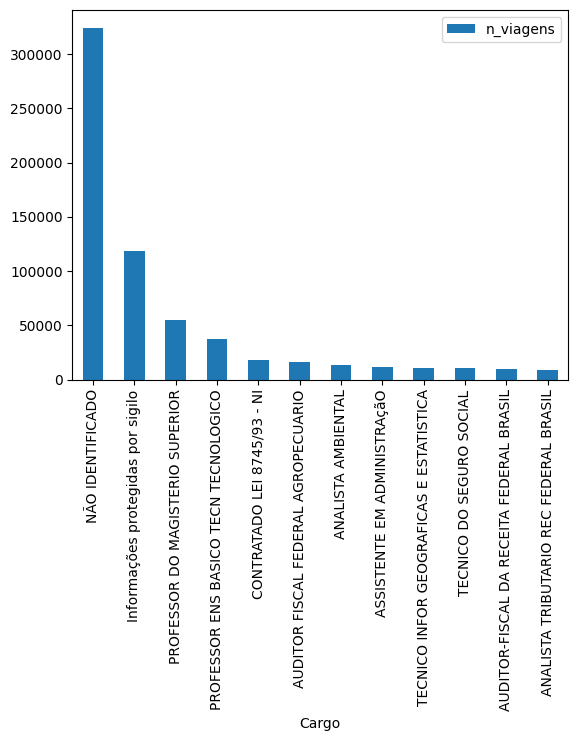

In [62]:
df_consolidada.plot(x='Cargo', y='n_viagens', kind='bar')

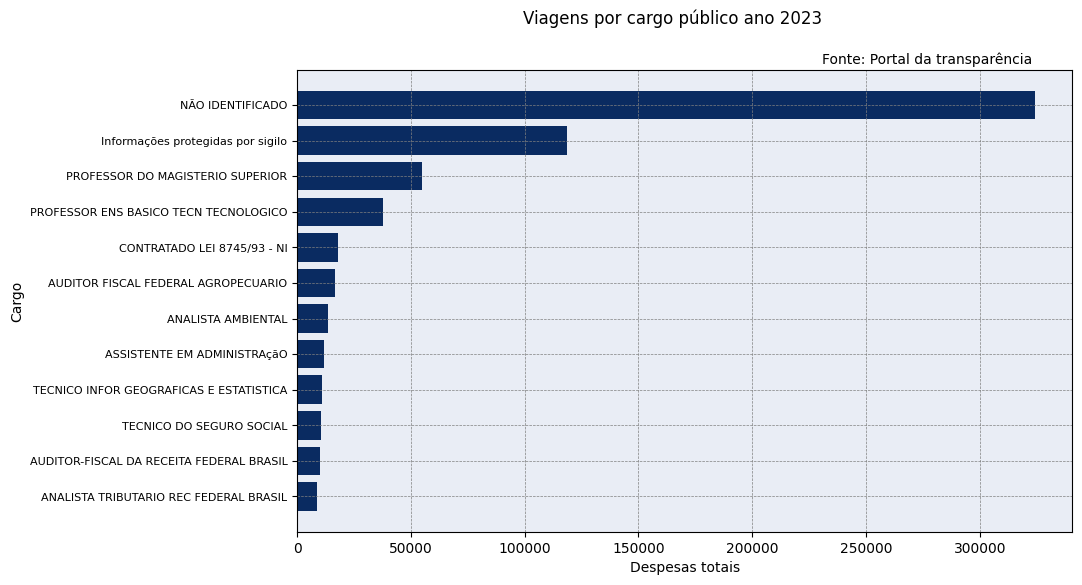

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_consolidada['Cargo'], df_consolidada['n_viagens'], color='#0a2b61')
ax.set_facecolor('#e9edf5')
ax.invert_yaxis()
ax.set_ylabel('Cargo')
ax.set_xlabel('Despesas totais')
fig.suptitle('Viagens por cargo público ano 2023')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.figtext(0.65,0.89,'Fonte: Portal da transparência')
plt.show()